<a href="https://colab.research.google.com/github/thanawat-hub/sharing_colab-github/blob/master/DSP_mel_wihtLibrosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference
https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf

https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

In [0]:
import os
os.chdir('/content/drive/My Drive/dataset')
!ls

2.wav		 count10.wav	    gtzan_model.h5    out.png	  test
convertmfcc.png  dataset	    gtzan_model.json  spec.png	  upload.png
convert.png	 gtzan_dataset.csv  music_wav	      speech_wav


In [0]:
!ipython --version

5.5.0


In [0]:
from IPython.display import Audio, Image#, display, YouTubeVideo
Audio(filename="count10.wav",autoplay=True) 

In [1]:
import librosa.display 
import numpy as np
import matplotlib.pyplot as plt

#load() return
#    1.the audio as a waveform `y` array data from wave
#    2.Store the sampling rate as `sr` by default 22050Hz mono.
y, sr = librosa.load('/content/drive/My Drive/dataset/count10.wav')
print(y)
print('this is a array data have total number =',len(y))
print('My sound count sampling rate =',sr,"Hz")

[-0.09502742 -0.13722245 -0.11257923 ...  0.10595091  0.11191896
  0.        ]
this is a array data have total number = 193805
My sound count sampling rate = 22050 Hz


In [0]:
print(type(y))
print(y)

<class 'numpy.ndarray'>
[-0.09502742 -0.13722245 -0.11257923 ...  0.10595091  0.11191896
  0.        ]


In [0]:
f"ndarray mean => Dimensional tensor = {y.ndim} call is 'vertor'" # this call f-string

"ndarray mean => Dimensional tensor = 1 call is 'vertor'"

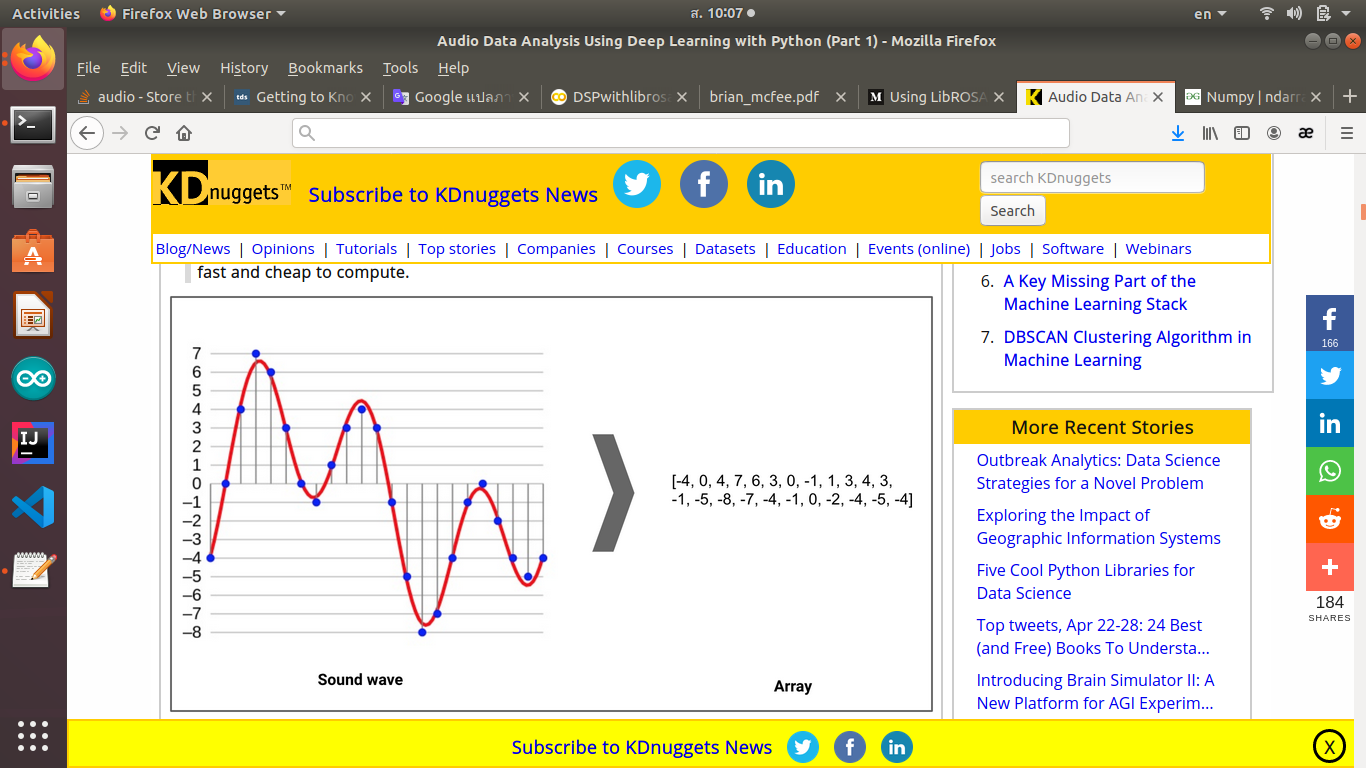

In [0]:
Image(filename="convert.png")

นี่เป็นการ แสดงสัญญาณเสียง ในรูปแบบดิจิตอล

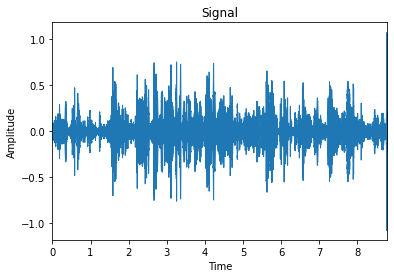

In [0]:
# plt.plot(y)
plt.title('Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

librosa.display.waveplot(y,sr=sr)

ซึ่งสัญญาณเสียงประกอบด้วยคลื่นความถี่เสียงหลายคลื่น

 การแปลงฟูริเยร์เป็นสูตรทางคณิตศาสตร์ที่ช่วยให้เรา

#สามารถแยกสัญญาณออกเป็นแต่ละความถี่และแอมพลิจูดของความถี่ 
#หรือแปลงสัญญาณจากโดเมนเวลาเป็นโดเมนความถี่ ซึ่งจะเรียกว่า สเปคตรัม

---



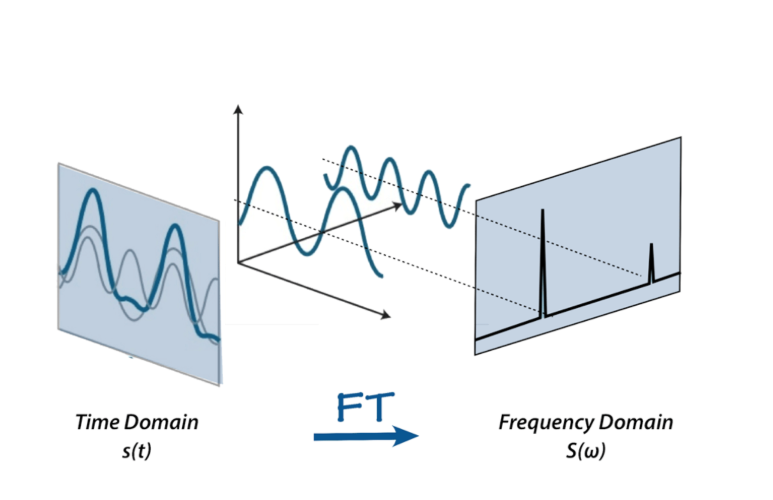

this is just a two dimensional representation of this complex and rich of sound! (vector = 1D tenser like array) 

In [0]:
print(y.size)#re :rowxcolumn
print(y.shape)#list number of row, colunm
#ค่าเท่ากัน เพราะเป็น1d tensor

193805
(193805,)


In [0]:
len(y)

193805

In [0]:
len(S)

128

Fast Fourier Transform (FFT) คืออัลกอริทึมที่ใช้ในการคำนวณ DFT 
เพื่อการประมาณสเปคตรัมของสัญญาณช่วงใดช่วงหนึ่ง
ตัว FFT เป็นตัวที่เหมาะสมเพราะว่าให้ผลลัพธ์เดียวกัน แต่ว่าเร็วกว่ามาก(เพราะแยกสัญญาณต่างๆออกไปแล้ว)

DFT (DiscreteFourier Transform) เป็นวิธีการแปลงลําดับของตัวเลขทั้งที่เป็นจํานวนจริงและจํานวนเชิงซ้อนจํานวน N จุด ไปอยู่ในรูปของลําดับของตัวเลขเชิงซ้อนจํานวน N จุด ในอีกชุดหนึ่ง

#แสดง spectrogram  แบบที่1 โดยใช้ fft แบบ shot-time

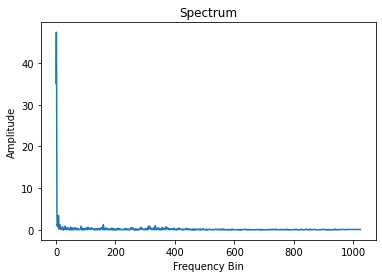

In [8]:
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1)) #hop_length =>number audio of frames between STFT columns.  
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

 frequency bin is a segment of the frequency axis that "collect" the 
amplitude, magnitude or energy from a small range of frequencies,

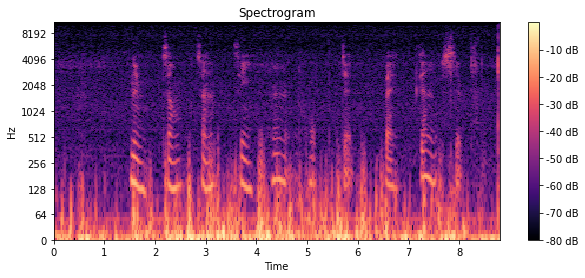

In [9]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

ติดเป็นเกล็ดความรู้
ระดับMelเกี่ยวข้องกับการรับรู้ความถี่หรือระดับเสียงของโทนเสียงบริสุทธิ์(แบบอนาล็อก)กับความถี่ที่วัดได้จริง
สูตรการแปลงจากความถี่เป็นสเกลเมลคือ:
#M (f) =  1125ln(1+f/700)
และการแปลงกลับ จากสเกลเมลเป็นความถี่
#M^-1 (m) = 700(exp(m/1125)-1)
ถ้าแปลงแล้วค่าไม่ตรงกับที่อาจอิ้งจากเว็บอื่น อาจเป็นเพราะ มีหลายสูตร เปลี่ยนไปตามปี
https://en.wikipedia.org/wiki/Mel_scale
ทำให้มีแหล่งอ้างอิงที่ค่าที่แปลงอาจจะคำนวณไม่ตรงกันก็เป็นด้ายย

#2 แปลงแบบใช้ Feature ของ librosa



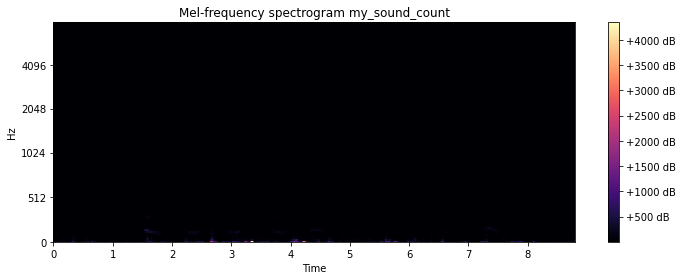

In [0]:
# Passing through arguments to the Mel filters
#n_mels is Number of Mel bands value => 32, 64,128 from  data of y 
#mel is a unit of sound 
#return large Scale of mel(it diff sclae between Hz)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)
plt.figure(figsize=(10, 4)) 

librosa.display.specshow(S, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram my_sound_count')
plt.tight_layout()
plt.show()

most sounds humans hear are concetrated in small frequency and Amplitude

In [0]:
s_ = np.max
s_

<function numpy.amax>

In [0]:
print('np.max=>Return the maximum of an array or maximum along an axis it\'s a .',type(s_))

np.max=>Return the maximum of an array or maximum along an axis it's a . <class 'function'>


 calculate the power spectrum of each frame

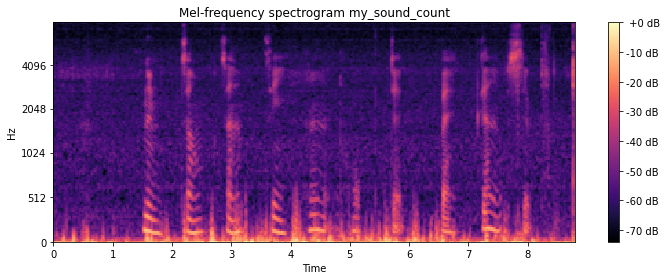

In [0]:
## Convert a power spectrogram (amplitude squared) to decibel (dB) units
# This computes the scaling 10 * log10(S / ref) in a numerically stable way.

S_dB = librosa.power_to_db(S,ref=np.max)


librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000

plt.figure(figsize=(10, 4))
plt.colorbar(format='%+3.0f dB')
plt.title('Mel-frequency spectrogram my_sound_count')
plt.tight_layout()
plt.show()


และอีกกระกระบวนการที่เรียกว่า Mel-Frequency Cepstral Coefficient (MFCC) เป็นฟีเจอร์(Feature(คุณสมบัติหนึ่ง))เพื่อแปลงไฟล์เสียงให้อยู่ในรูปแบบ vector หลาย ๆ ตัว โดยจะมีการเลือก time frame เพื่อให้เฟรมนั้นกลายเป็น vector 
ซึ่งเป็นที่นิยมสำหรับการในด้าน  automatic speech and speaker recognition. อย่างแพร่หลาย 
 

สัญญาณเสียงมีการเปลี่ยนแปลงอยู่ตลอดเวลาดังนั้นเพื่อลดความซับซ้อน
จึงใช้ช่วงเวลาสั้น ๆ ของสัญญาณเสียง ซึ่งสัญญาณเสียงจะไม่เปลี่ยนแปลงมาก
จึงนิยมใช้สัญญาณเป็น 20-40ms/เฟรม(time frame) 
[ถ้าหากเฟรมสั้นมากไป เราไม่มีตัวอย่าง(ข้อมูลที่เป็นอาเรย์)เพียงพอที่จะได้ค่าประมาณสเปกตรัมที่เชื่อถือได้]
refer=>http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

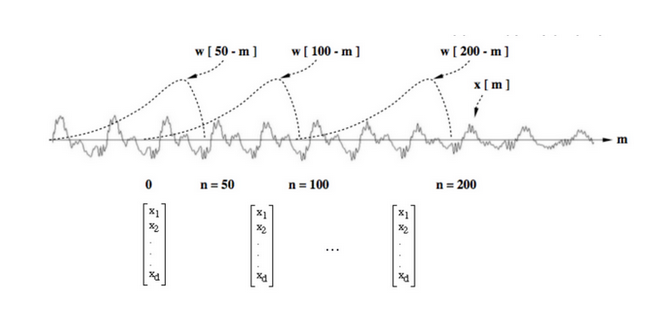

In [0]:
Image(filename='convertmfcc.png')
#referance https://medium.com/@daianan/introduction-to-automatic-speech-recognition-kaldi-9ea3aa901818

delta is differential and acceleration coefficients. 

the delta-features are linear transforms of the input features, such that if they are combined with a linear layer in a subsequent neural network, then in principle, the two consecutive linear layers are redundant. However, using delta-features can still provide a benefit in convergence.
In any case, delta- and delta-delta features are a classic component of machine learning algorithms. They are successful because they are very simple to calculate and provide often a clear benefit over the instantaneous features.
refer https://wiki.aalto.fi/display/ITSP/Deltas+and+Delta-deltas

คือ ทำการนำค่า frame แต่ละframe แปลงมาในรูปvector(mfcc)
เพื่อนำ ช่วงเฟรมเปลี่ยนเป็นข้อมูลตั
วเลขแล้วนำมาเข้าfeatrue delta เพื่อนำค่ามากรองแล้วนำค่าที่มีประสิทธิ์ภาพจากการ derivative มากขึ้น ไปเข้า layer neural network เพื่อทำการ prediction เสียง 
(แต่ที่ยกตัวอย่างในส่วนนี้ยังไม่ได้ สร้างframe
        เพื่อใช้กำหนด่ามาทำค่า input เข้าlayer) 

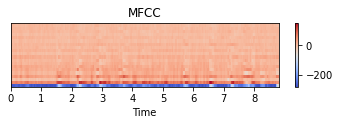

In [15]:
import matplotlib.pyplot as plt

mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc_delta = librosa.feature.delta(mfcc)
# local estimate of the derivative of the input data along the selected axis.
# Delta features are computed Savitsky-Golay filtering.

plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc, x_axis='time')#order of the difference operator. 1 for first derivative, 2 for second, etc.
plt.title('MFCC')
plt.colorbar()

MFCC คำนึงถึงการรับรู้ของมนุษย์สำหรับความอ่อนไหว(ความ sensitivity ของมนุษย์)ที่ความถี่ที่เหมาะสมโดยการแปลงความถี่ดั้งเดิม(Hz)เป็น Mel Scale ึ่ซึ่งเหมาะสำหรับงานการรู้เพื่อจำเสียงค่อนข้างดี (เนื่องจากเหมาะสำหรับการทำความเข้าใจมนุษย์และความถี่ที่มนุษย์พูดมากที่สุด)

refer
https://www.researchgate.net/post/What_is_Mfcc_and_how_to_know_which_part_of_signal_mfc_coefficient_are_important_to_train_a_neural_network_model

ถ้าผิดพลาดหรืออธิบายผิดอย่างไร ขอคำชี้แนะด้วยนะค้าบบ
เผื่อคนอยากศึกษา ขอบคุณครับ
ต่อpart 2 CNN